## 🔄 Workflow
### 1. Introduction

### 🩺 Breast Cancer Diagnosis – Binary Classification
This notebook builds a binary classification model to predict whether a breast tumor is **malignant (M)** or **benign (B)** using the Breast Cancer Wisconsin (Diagnostic) dataset.

We will:
- Explore and clean the data
- Preprocess features
- Train a classification model (Logistic Regression)
- Evaluate the model performance


### 2. Import Libraries

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### 3. Load the Dataset & Basic Information

In [387]:
import pandas as pd
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [389]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### 4. EDA – Exploratory Data Analysis
It’s the process of examining and visualizing your dataset to understand:

- What kind of data you have

- What patterns, trends, or relationships exist

- Whether the data is clean and usable

- Which features (columns) are important for prediction

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [394]:
df.describe() 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


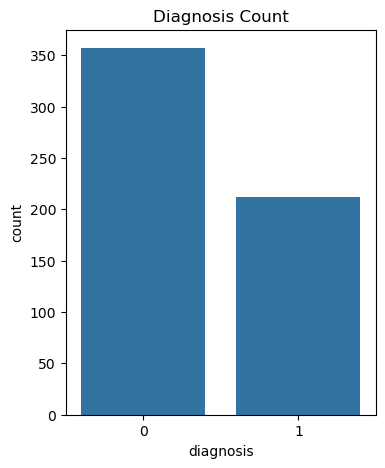

Text(0.5, 1.0, 'Feature Correlation Heatmap')

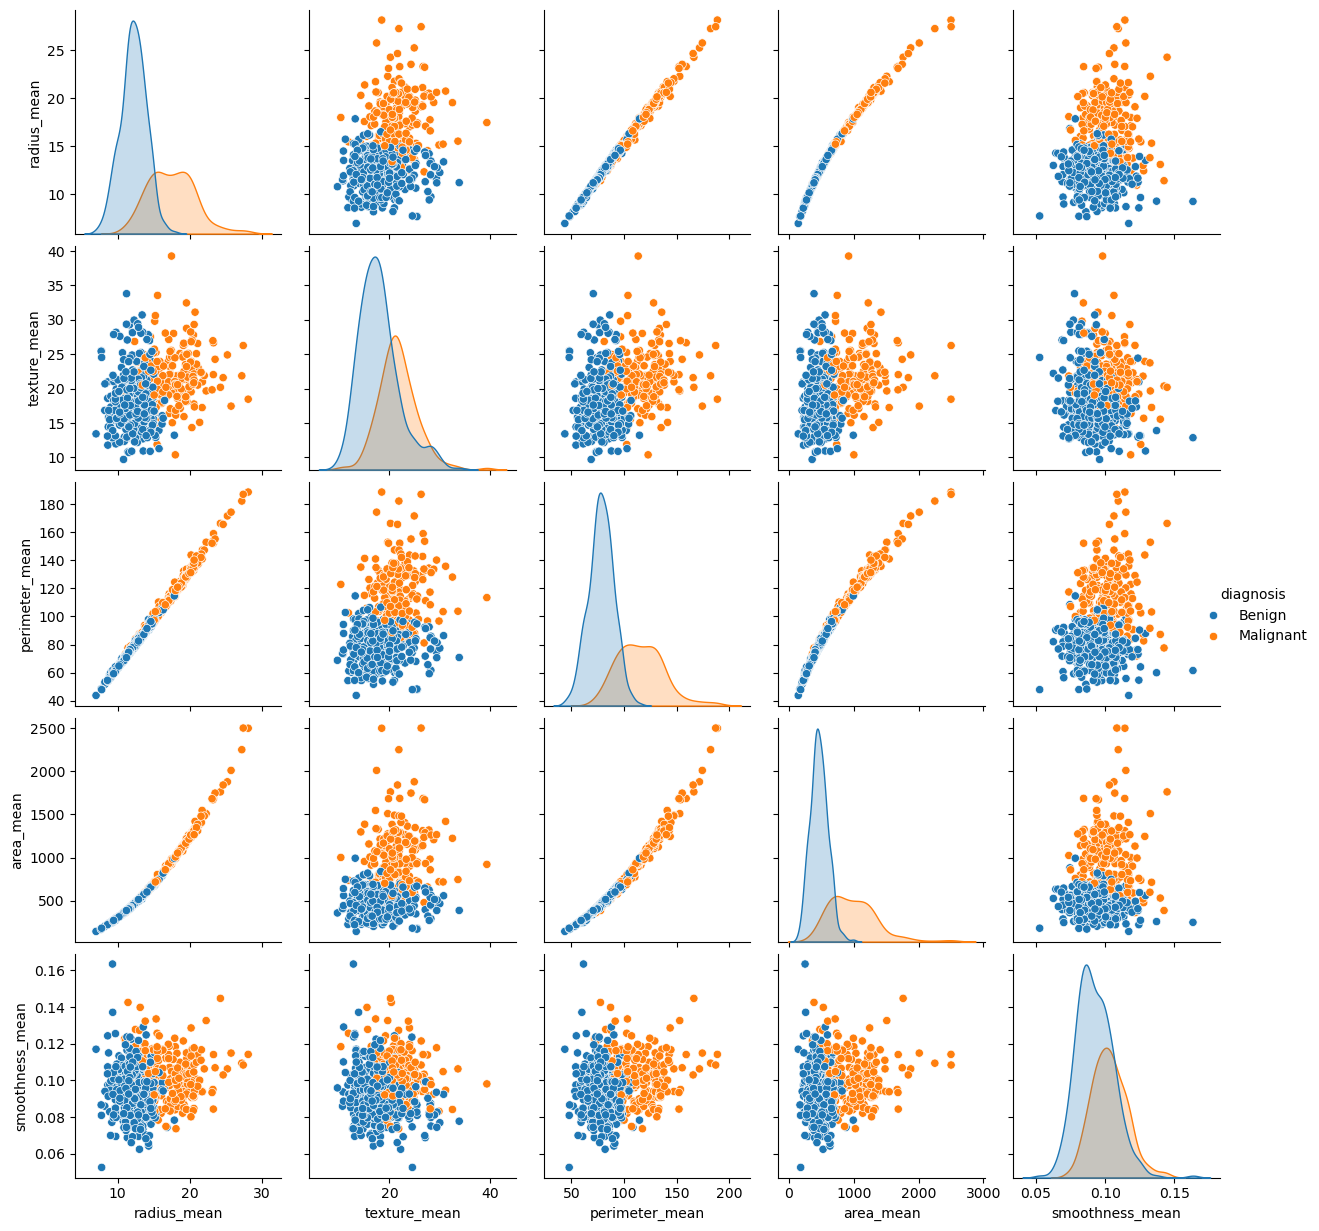

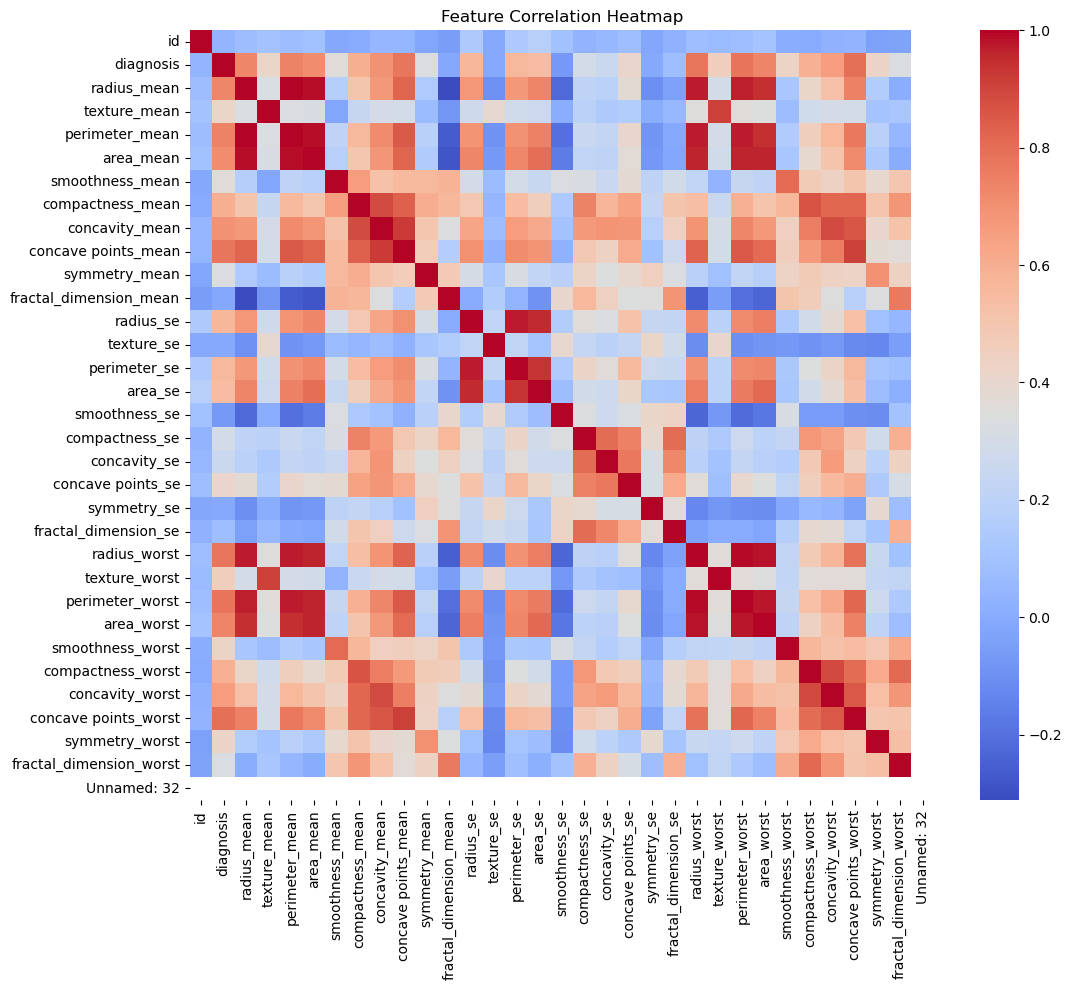

In [396]:
# Convert 'diagnosis' to numeric: M → 1 (malignant), B → 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


# Countplot of target classes
plt.figure(figsize=(4, 5))  
sns.countplot(x='diagnosis', data=df)
plt.title("Diagnosis Count")
plt.show()

# Create the pairplot and assign it to a variable
plot = sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']], hue='diagnosis')

# Update the legend labels
new_labels = ['Benign', 'Malignant']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

# Correlation matrix heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")


### 5. Data Cleaning

In [399]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [401]:
df.drop(columns=['Unnamed: 32'], inplace=True)
df_clean = df.copy()  # make a copy if needed


### 6. Feature Selection and Preprocessing
we will drop **highly correlated** or **low-importance** features manually

**Why** droppping the high correlated ones? to avoid redundancy, noise without new information.If we keep the info, this may:
- Increases risk of overfitting: The model may "memorize" patterns rather than generalize.
- Makes interpretation harder: It's difficult to know which feature actually contributes.
- Confuses certain algorithms: Especially linear models like logistic regression, where multicollinearity can distort the coefficients.



In [404]:
# Step 1: Correlation matrix (absolute values)
corr_matrix = df_clean.corr().abs()

# Step 2: Upper triangle only (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Find pairs with correlation > 0.9
high_corr_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > 0.9
]

# Step 4: Show those pairs as a DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
print("Highly correlated feature pairs (correlation > 0.9):")
print(high_corr_df)

Highly correlated feature pairs (correlation > 0.9):
               Feature 1            Feature 2  Correlation
0         perimeter_mean          radius_mean     0.997855
1              area_mean          radius_mean     0.987357
2              area_mean       perimeter_mean     0.986507
3    concave points_mean       concavity_mean     0.921391
4           perimeter_se            radius_se     0.972794
5                area_se            radius_se     0.951830
6                area_se         perimeter_se     0.937655
7           radius_worst          radius_mean     0.969539
8           radius_worst       perimeter_mean     0.969476
9           radius_worst            area_mean     0.962746
10         texture_worst         texture_mean     0.912045
11       perimeter_worst          radius_mean     0.965137
12       perimeter_worst       perimeter_mean     0.970387
13       perimeter_worst            area_mean     0.959120
14       perimeter_worst         radius_worst     0.993708
15 

### Let’s Analyze Some Key Pairs:
 Group 1: **radius_mean, perimeter_mean, area_mean**
All three are very highly correlated

Keep: **radius_mean**

It's directly measurable and more interpretable

Simpler value range (7 to 28), versus area_mean (143 to 2501)

Drop: **perimeter_mean, area_mean**

In [407]:
df_clean = df_clean.drop(['perimeter_mean','area_mean'], axis=1)

Group 2: **concave_points_mean, concavity_mean**
Correlation: ~0.92

Keep: **concavity_mean**

It's a more general concept and less sparse

Drop: **concave_points_mean**

It has smaller values and less variation

In [410]:
df_clean = df_clean.drop(['concave points_mean'], axis=1)

Group 3: **radius_se, perimeter_se, area_se**
Keep: **radius_se** (simpler and core measurement)

Drop: **perimeter_se, area_se**

In [413]:
df_clean = df_clean.drop(['perimeter_se', 'area_se'], axis=1)

Group 4: **radius_worst, perimeter_worst, area_worst**
Keep: **radius_worst**

Drop: **perimeter_worst, area_worst**

In [416]:
df_clean = df_clean.drop(['perimeter_worst','area_worst'], axis=1)

Group 5: **texture_worst vs texture_mean**
Correlation: 0.91

Keep: **texture_mean** (less affected by outliers)

Drop: **texture_worst**

In [419]:
df_clean = df_clean.drop(['texture_worst'], axis=1)

Group 6: concave_points_worst vs concave points_mean
Correlation: 0.91

However we drop the 'concave points_mean' in the second step.

In [422]:
df_clean = df_clean.drop(['id'], axis=1)

**Why** droppping the **low-importance** ones? If we keep the info, this may:
- Don’t help the model learn: They carry almost no useful signal.
- Slow down training: Especially with large datasets.
- Add noise: They can clutter the data and hurt accuracy slightly.


In [425]:
# 1. Split features and labels
X = df_clean.drop(columns=['diagnosis'])  # or your actual target
y = df_clean['diagnosis']

# 2. Apply low-variance filtering to X BEFORE train-test split
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

selector = VarianceThreshold(threshold=0.01)
selector.fit(X)

# Get low-variance features
low_var_features = X.columns[~selector.get_support()]

# Print them as a column
print("Low-variance features (variance < 0.01):")
print(pd.Series(low_var_features, name="Feature"))


# (optional) Drop them if you decide
# X = X.drop(columns=low_var_features)

# 3. Now split your data
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Low-variance features (variance < 0.01):
0             smoothness_mean
1            compactness_mean
2              concavity_mean
3               symmetry_mean
4      fractal_dimension_mean
5               smoothness_se
6              compactness_se
7                concavity_se
8           concave points_se
9                 symmetry_se
10       fractal_dimension_se
11           smoothness_worst
12       concave points_worst
13             symmetry_worst
14    fractal_dimension_worst
Name: Feature, dtype: object


In [427]:
#we will drop them
X = X.drop(columns=low_var_features)

### 7. Train/Test Split

In [430]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [432]:
X_train

,radius_mean,texture_mean,radius_se,texture_se,radius_worst,compactness_worst,concavity_worst
68,9.029,17.33,0.3274,1.1940,10.310,0.43650,1.25200
181,21.090,26.57,0.6298,0.7629,26.680,0.75840,0.67800
63,9.173,13.86,0.4098,2.2650,10.010,0.16780,0.13970
248,10.650,25.22,0.2497,1.4930,12.250,0.13980,0.11250
60,10.170,14.88,0.5158,1.4410,11.020,0.09866,0.02168
...,...,...,...,...,...,...,...
71,8.888,14.64,0.5262,0.8522,9.733,0.24360,0.14340
106,11.640,18.33,0.3060,1.6570,13.140,0.26600,0.28730
270,14.290,16.82,0.1302,0.7198,14.910,0.05036,0.03866
435,13.980,19.62,0.2208,0.9533,17.040,0.35680,0.40690


### 8. Train the Model

In [435]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Step 1: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "HistGradient Boosting": HistGradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

# 📌 Step 2: Train, Predict, Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# 📌 Step 3: Display Results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)


                   Model  Accuracy  Precision    Recall  F1 Score
9         MLP Classifier  0.982456   1.000000  0.953488  0.976190
4          Random Forest  0.973684   0.976190  0.953488  0.964706
5      Gradient Boosting  0.964912   0.953488  0.953488  0.953488
6  HistGradient Boosting  0.964912   0.953488  0.953488  0.953488
0    Logistic Regression  0.964912   0.975610  0.930233  0.952381
7                    KNN  0.947368   0.951220  0.906977  0.928571
1       Ridge Classifier  0.947368   0.974359  0.883721  0.926829
2         SGD Classifier  0.929825   1.000000  0.813953  0.897436
8                    SVM  0.921053   0.925000  0.860465  0.891566
3          Decision Tree  0.903509   0.833333  0.930233  0.879121


### 9. Evaluate the Model

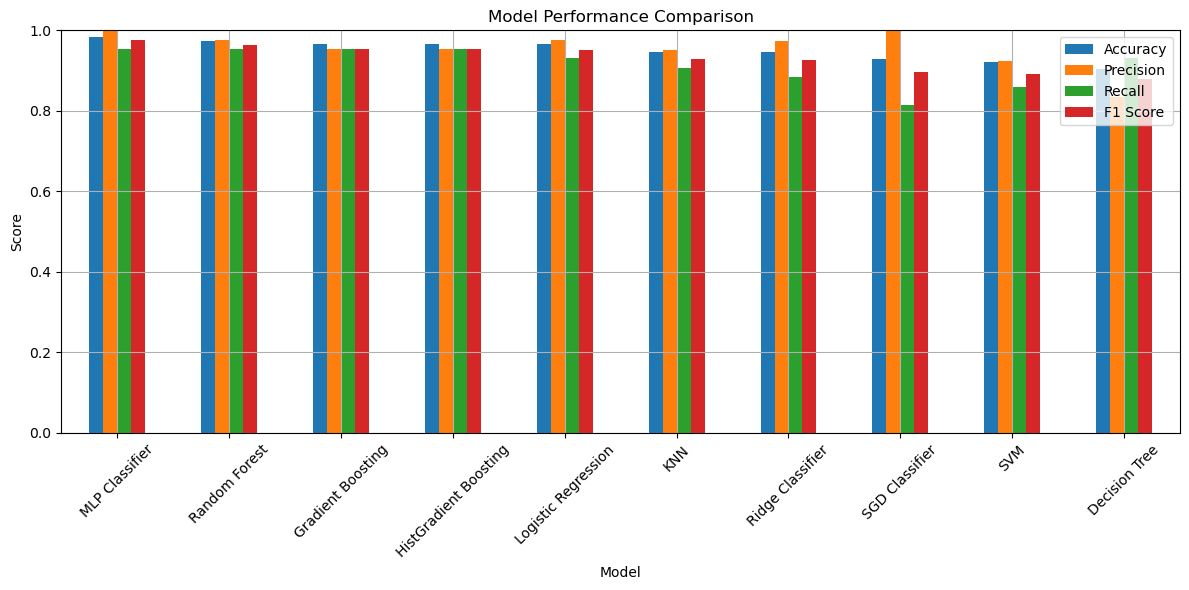

In [438]:
results_df.set_index('Model')[["Accuracy", "Precision", "Recall", "F1 Score"]].plot.bar(figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

### 10. Visualize Confusion Matrix

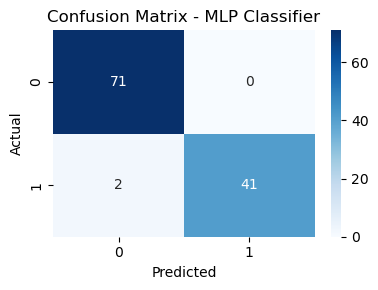

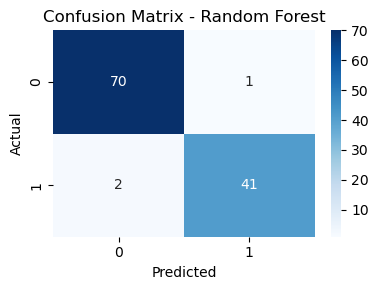

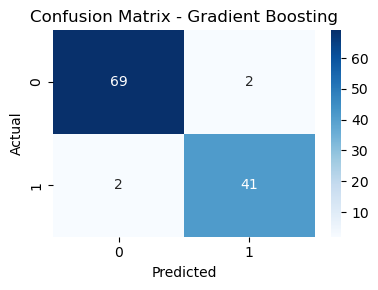

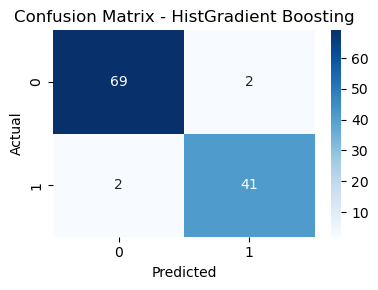

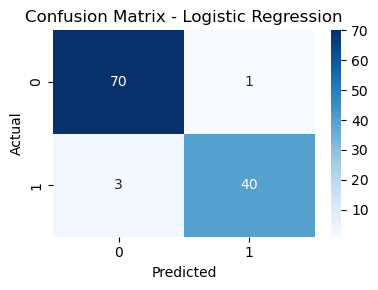

In [441]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

top_models = results_df.sort_values(by="F1 Score", ascending=False).head(5)["Model"]

for model_name in top_models:
    model = models[model_name]
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


### 11. Model Interpretation

radius_worst         0.305201
radius_mean          0.220797
concavity_worst      0.186143
compactness_worst    0.111594
radius_se            0.086102
texture_mean         0.060888
texture_se           0.029275
dtype: float64


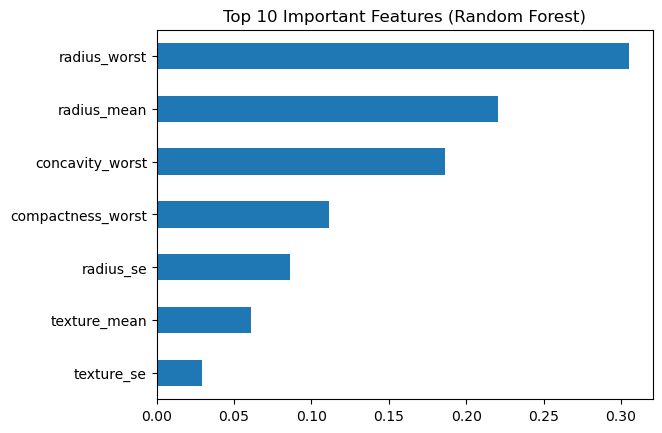

In [444]:
# Feature importance for Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_

feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance_df.head(10))

feature_importance_df.head(10).plot(kind='barh', title='Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


### 12. Conclusion

### ✅ Conclusion

- **Best Performing Model**:  
  The **MLP Classifier** achieved the highest performance with an **Accuracy of 98.2%** and **F1 Score of 0.976**, indicating excellent balance between precision and recall.

- **Strong Contenders**:
  - **Random Forest** and **Gradient Boosting** followed closely with F1 Scores of **0.9647** and **0.9534**, showing robust generalization with high precision and recall.
  - **HistGradient Boosting** performed identically to Gradient Boosting, suggesting consistent feature learning across boosting methods.

- **Most Consistent Models**:
  - Ensemble methods like Random Forest and Boosting models performed consistently well across all metrics.
  - **Logistic Regression** and **KNN** also showed strong balance, especially for recall.

- **Lower Performing Models**:
  - **Decision Tree** had the lowest F1 Score (**0.8791**) due to lower precision.
  - **SVM** and **SGD Classifier** performed acceptably but were outpaced by the ensemble and neural models.

- **Feature Insights**:
  - Feature importance from models like **HistGradient Boosting** and **Decision Tree** revealed that features such as `[insert top features here from your plot]` contributed significantly to model predictions.

---

### 📌 Next Steps

- **Tune Hyperparameters** for MLP and ensemble models (e.g., learning rate, tree depth, hidden layers)
-  **Cross-validate** the top 3 models for stability
-  Consider **model ensembling** (voting or stacking)
-  Analyze **misclassified examples** using confusion matrices
-  If dataset is imbalanced, explore techniques like **SMOTE** or **class weights**

